# Example analysis of the simulation results for <sup>26</sup>Al

In this notebook the same analysis carried out in the script _Al26_Activity.m_ is executed.

In [6]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_lim = 800; # cm

# Meteorite properties
meteoriteRadius = 241*100;  # cm
meteoriteDensity = 1.194;   # g/cm

In [3]:
# Get data from txt file (we just need the second column)

# Data for protons
filename = 'Al26_Shielding_M660.txt'
txt_file=open(filename,"r")
lines=txt_file.readlines()
Shield_RadionuclidesNumber=[]
for line in lines:
    Shield_RadionuclidesNumber.append(int(line.split('   ')[1]))
txt_file.close()
Shield_RadionuclidesNumber = np.array(Shield_RadionuclidesNumber)


# Data for alpha-particles
filename = 'Al26_Shielding_M660_alpha.txt'
txt_file=open(filename,"r")
lines=txt_file.readlines()
Shield_RadionuclidesNumber_alpha=[]
for line in lines:
    Shield_RadionuclidesNumber_alpha.append(int(line.split('   ')[1]))
txt_file.close()
Shield_RadionuclidesNumber_alpha = np.array(Shield_RadionuclidesNumber_alpha)


In [4]:
# Prepare data
sigma_Shield_RadionuclidesNumber       = np.sqrt(Shield_RadionuclidesNumber)
sigma_Shield_RadionuclidesNumber_alpha = np.sqrt(Shield_RadionuclidesNumber_alpha)

In [5]:
# Extract activities
masses = [] # g
step = 2 # cm
depth = np.arange(1, 800, step, dtype=int)

index = 1
for index in range(len(Shield_RadionuclidesNumber)):
    upRadius = meteoriteRadius - step*(index-1)
    lowRadius = meteoriteRadius - step*index
    a = upRadius*upRadius*upRadius
    b = lowRadius*lowRadius*lowRadius
    masses.append(4/3 * np.pi * (a-b) * meteoriteDensity) # g

masses = np.array(masses)/1000 # kg


# Partial activities
Shield_activity             = np.divide(Shield_RadionuclidesNumber, masses)*600000
sigma_Shield_activity       = np.divide(sigma_Shield_RadionuclidesNumber, masses)*600000
Shield_activity_alpha       = np.divide(Shield_RadionuclidesNumber_alpha, masses)*60000
sigma_Shield_activity_alpha = np.divide(sigma_Shield_RadionuclidesNumber_alpha, masses)*60000

# Total activity
Shield_activity_tot = Shield_activity + Shield_activity_alpha;
sigma_Shield_activity_tot = np.sqrt(sigma_Shield_activity**2 + sigma_Shield_activity_alpha**2)

Text(0.5, 1.0, '$^{26}$Al')

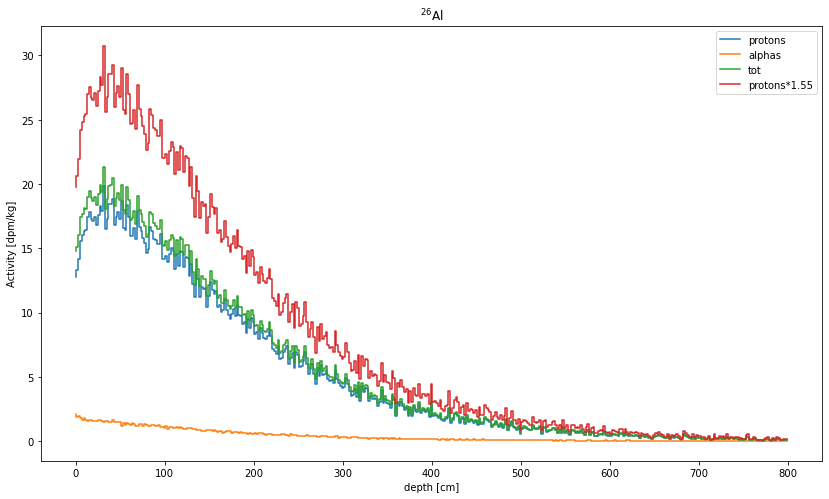

In [14]:
# Plot results
plt.figure(figsize=(14,8))
plt.step(depth, Shield_activity,       label='protons')
plt.step(depth, Shield_activity_alpha, label='alphas')
plt.step(depth, Shield_activity_tot,   label='tot')
plt.step(depth, Shield_activity*1.55,  label='protons*1.55')
plt.xlabel('depth [cm]')
plt.ylabel('Activity [dpm/kg]')
plt.legend()
plt.title('$^{26}$Al')